# Skin Cancer Prediction GradCam Visualization

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import inception_resnet_v2
from matplotlib import pyplot as plt

from tf_keras_vis.activation_maximization import ActivationMaximization
from tf_keras_vis.activation_maximization.callbacks import Progress
from tf_keras_vis.activation_maximization.input_modifiers import Jitter, Rotate2D
from tf_keras_vis.activation_maximization.regularizers import TotalVariation2D, Norm
from tf_keras_vis.utils.model_modifiers import ExtractIntermediateLayer, ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore

In [7]:
model = keras.models.load_model('InceptionResnetv2.hdf5')
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_203 (Conv2D)             (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_203 (BatchN (None, 111, 111, 32) 96          conv2d_203[0][0]                 
__________________________________________________________________________________________________
activation_203 (Activation)     (None, 111, 111, 32) 0           batch_normalization_203[0][0]    
____________________________________________________________________________________________

In [14]:
from tf_keras_vis.utils.model_modifiers import ExtractIntermediateLayer, ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore
from tf_keras_vis.activation_maximization import ActivationMaximization

layer_name = 'conv_7b'
extract_intermediate_layer = ExtractIntermediateLayer(index_or_name=layer_name)
replace2linear = ReplaceToLinear()

filter_number = 0
score = CategoricalScore(filter_number)


activation_maximization = ActivationMaximization(model,
                                                 model_modifier=[extract_intermediate_layer, replace2linear],
                                                 clone=False)

## Visualizing Conv filters using ActivationMaximization

200/200 [==============================] - 92s 461ms/step - Score: 245.4254 - TotalVariation2D: 14.4440 - Norm: 34.5419


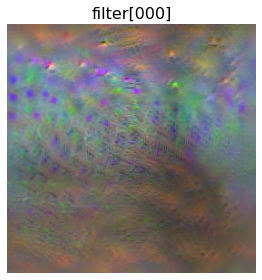

CPU times: user 1min 32s, sys: 752 ms, total: 1min 32s
Wall time: 1min 32s


In [16]:
%%time

from tf_keras_vis.activation_maximization.callbacks import Progress

# Generate maximized activation
activations = activation_maximization(score,
                                      callbacks=[Progress()])

## Since v0.6.0, calling `astype()` is NOT necessary.
# activations = activations[0].astype(np.uint8)

# Render
f, ax = plt.subplots(figsize=(4, 4))
ax.imshow(activations[0])
ax.set_title('filter[{:03d}]'.format(filter_number), fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()

200/200 [==============================] - 99s 494ms/step - Score: 909.1293 - TotalVariation2D: 13.8411 - Norm: 35.7496


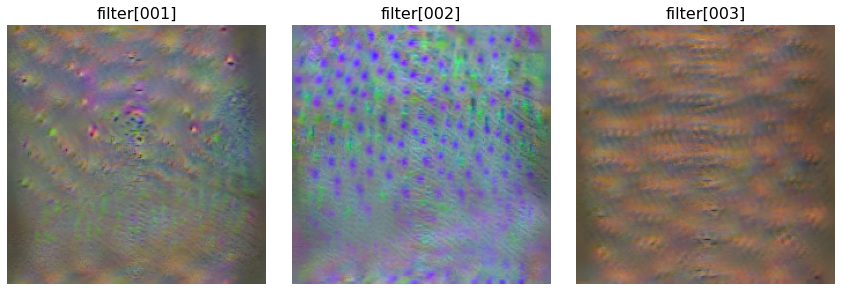

In [33]:
from tf_keras_vis.activation_maximization.callbacks import Progress
from tf_keras_vis.utils.scores import CategoricalScore


filter_numbers = [1,2,3]
scores = CategoricalScore(filter_numbers)
seed_input = tf.random.uniform((3, 224, 224, 3),0,255)
activations = activation_maximization(scores,
                                      seed_input=seed_input,
                                      callbacks=[Progress()])


f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, filter_number in enumerate(filter_numbers):
    ax[i].set_title('filter[{:03d}]'.format(filter_number), fontsize=16)
    ax[i].imshow(activations[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

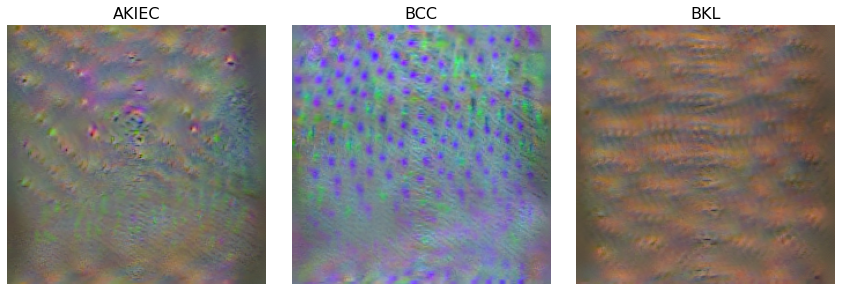

In [34]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

filter_numbers=['AKIEC', 'BCC', 'BKL']

for i, filter_number in enumerate(filter_numbers):
    ax[i].set_title(filter_number, fontsize=16)
    ax[i].imshow(activations[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

## Visualizing Dense layer using ActivationMaximization

In [35]:
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore
from tf_keras_vis.activation_maximization import ActivationMaximization

replace2linear = ReplaceToLinear()
score = CategoricalScore(1)
activation_maximization = ActivationMaximization(model,
                                                 model_modifier=replace2linear,
                                                 clone=True)

In [ ]:
from tf_keras_vis.activation_maximization.callbacks import Progress
from tf_keras_vis.activation_maximization.input_modifiers import Jitter, Rotate2D, Scale
from tf_keras_vis.activation_maximization.regularizers import Norm, TotalVariation2D


activations = activation_maximization(score,
                                      callbacks=[Progress()])

f, ax = plt.subplots(figsize=(4, 4))
ax.imshow(activations[0])
ax.set_title('F-1', fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()

200/200 [==============================] - 100s 502ms/step - Score: 3629.1875 - TotalVariation2D: 15.3830 - Norm: 36.3657


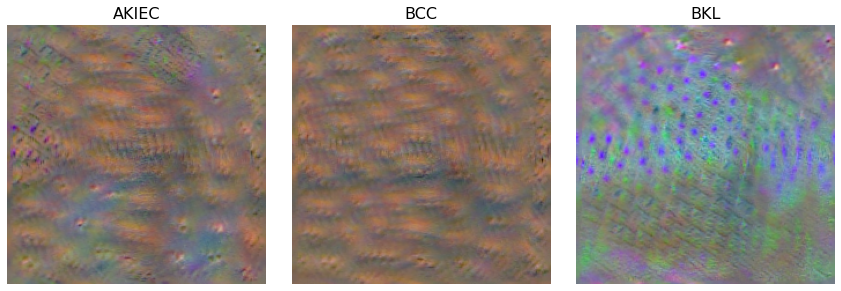

In [67]:
from tf_keras_vis.activation_maximization.input_modifiers import Jitter, Rotate2D, Scale
from tf_keras_vis.activation_maximization.regularizers import Norm, TotalVariation2D
from tf_keras_vis.activation_maximization.callbacks import Progress, PrintLogger


image_titles = ['AKIEC', 'BCC', 'BKL']
scores = CategoricalScore([1, 2, 3])
seed_input = tf.random.uniform((3, 224, 224, 3),0,255)


activations = activation_maximization(scores,
                                      seed_input=seed_input,
                                      callbacks=[Progress()])


f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(activations[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

In [112]:
img.shape

(1, 224, 224, 3)

In [113]:
seed_input.shape

TensorShape([3, 224, 224, 3])

## Filters of Input

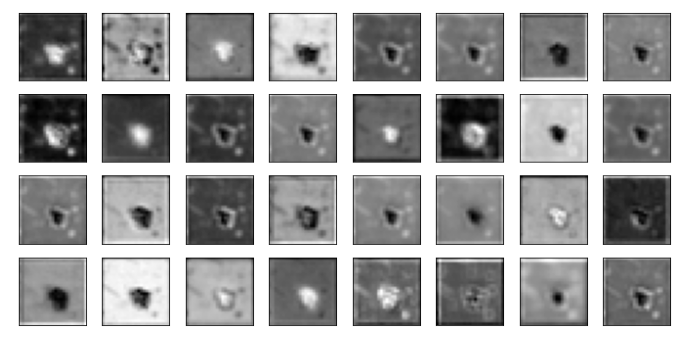

In [8]:
model_copy=model
import numpy as np
from keras.models import Model

conv_layer_index = [50,100,150,200]  #TO define a shorter model
outputs = [model.layers[i].output for i in conv_layer_index]
model_short = Model(inputs=model.inputs, outputs=outputs)
#print(model_short.summary())

#Input shape to the model is 224 x 224. SO resize input image to this shape.
from keras.preprocessing.image import load_img, img_to_array
img = load_img('skin2.jpg', target_size=(224, 224)) #VGG user 224 as input

# convert the image to an array
img = img_to_array(img)
# expand dimensions to match the shape of model input
img = np.expand_dims(img, axis=0)

# Generate feature output by predicting on the input image
feature_output = model_short.predict(img)

len(feature_output[0])

columns = 8
rows = 8
for ftr in feature_output:
    fig=plt.figure(figsize=(12, 12))
    for i in range(1, columns*rows +1):
        fig =plt.subplot(rows, columns, i)
        fig.set_xticks([])  #Turn off axis
        fig.set_yticks([])
        plt.imshow(ftr[0, :, :, i-1], cmap='gray')
        #pos += 1
    plt.tight_layout()
    plt.show()

# Grad Cam

In [204]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2
import seaborn as sns

In [165]:
def get_img_array(img_path, size):
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    array = keras.preprocessing.image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [174]:
from tensorflow.keras.applications.resnet_v2 import preprocess_input as base_preprocess


def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=1.2):
    #img = keras.preprocessing.image.load_img(img_path)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (250,250))
    img = keras.preprocessing.image.img_to_array(img)

    heatmap = np.uint8(255 * heatmap)

    jet = cm.get_cmap("viridis")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    superimposed_img = jet_heatmap*alpha + img-50
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
    return superimposed_img

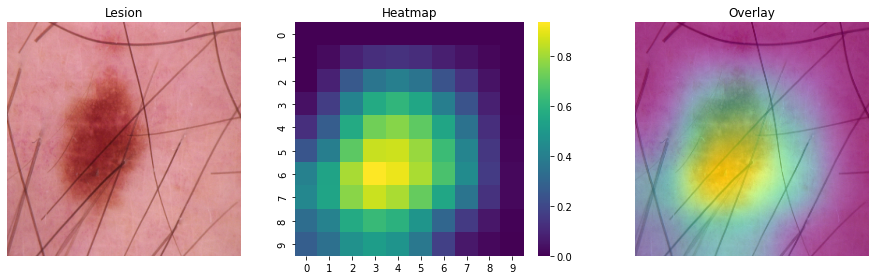

In [197]:
img_path='skin3.jpg'

img_array = base_preprocess(get_img_array(img_path, size=(224,224)))
last_conv_layer_name = "conv_7b"
model.layers[-1].activation = None
preds = model.predict(img_array)
#print("Predicted:", preds)

heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

image_titles=['Lesion', 'Heatmap', 'Overlay']
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4))

lesion=cv2.imread(img_path)
lesion = cv2.resize(lesion,(300,300))
lesion = cv2.cvtColor(lesion, cv2.COLOR_BGR2RGB)
heatmap=cv2.resize(heatmap, (10,10))
superimp=save_and_display_gradcam(img_path, heatmap)
overlay_arr = [lesion, heatmap, superimp]

for i, title in enumerate(image_titles):
    if i==1:
        ax[i].set_title(title, fontsize=12)
        sns.heatmap(overlay_arr[i],ax=ax[i],cmap="viridis",)
        continue
    ax[i].set_title(title, fontsize=12)
    ax[i].imshow(overlay_arr[i])
    ax[i].axis('off')

plt.tight_layout()
plt.show()